# Importing the necessary libraries 

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the dataset

In [127]:
data = pd.read_csv('C:\\Users\\nuzha\\Desktop\\Result_Auto_Prova.csv')

In [128]:
# Displaying the first 5 rows of the dataset
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495,11.190476,9.370370,low,0,1
1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500,11.190476,9.370370,low,0,1
2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500,12.368421,9.730769,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950,9.791667,8.433333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450,13.055556,11.500000,low,0,1


The dataset contains various features about automobiles, including their make, body style, engine type, horsepower, and many more. The target variable I am interested in predicting is price. To proceed with PCA (Principal Component Analysis), I need to preprocess the data: Handle missing values, Convert categorical variables into numerical format, Normalize/standardize the data. After preprocessing, I will apply PCA and identify the features that contribute the most to predicting the price of an automobile.

# Pre-processing and cleaning the data

In [129]:
# Checking for missing values
missing_data = data.isnull().sum()

In [130]:
# Displaying columns with missing values
missing_data[missing_data > 0]

Series([], dtype: int64)

In [131]:
# Confirming no missing values 
data.isnull().mean()*100

symboling            0.0
normalized-losses    0.0
make                 0.0
aspiration           0.0
num-of-doors         0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
city-L/100km         0.0
highway-L/100km      0.0
horsepower-binned    0.0
fuel-type-diesel     0.0
fuel-type-gas        0.0
dtype: float64

In [132]:
# Dropping the 'price' column as it is my target variable
X = data.drop(columns=['price'])

In [133]:
# Encoding categorical variables
X_encoded = pd.get_dummies(X)

In [134]:
# Standardizing the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_encoded)

In [135]:
# Displaying the first 5 rows of the standardized data
pd.DataFrame(X_standardized, columns=X_encoded.columns).head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_high,horsepower-binned_low,horsepower-binned_medium
0,1.730985,-0.002877,-1.733321,-0.467985,-0.878407,-2.098448,-0.030470,0.073467,0.504279,-1.887060,...,-0.656097,-0.118678,-0.328165,-0.068199,1.037749,-0.208514,-0.068199,-0.153937,0.555959,-0.520181
1,1.730985,-0.002877,-1.733321,-0.467985,-0.878407,-2.098448,-0.030470,0.073467,0.504279,-1.887060,...,-0.656097,-0.118678,-0.328165,-0.068199,1.037749,-0.208514,-0.068199,-0.153937,0.555959,-0.520181
2,0.139952,-0.002877,-0.742541,-0.272100,-0.210323,-0.616787,0.507232,0.617261,-2.440513,0.680740,...,-0.656097,-0.118678,-0.328165,-0.068199,1.037749,-0.208514,-0.068199,-0.153937,-1.798692,1.922408
3,0.935469,1.333074,0.147482,0.168641,0.123719,0.165201,-0.443033,-0.445609,-0.539445,0.453213,...,-0.656097,-0.118678,-0.328165,-0.068199,1.037749,-0.208514,-0.068199,-0.153937,0.555959,-0.520181
4,0.935469,1.333074,0.080310,0.168641,0.219160,0.165201,0.509187,0.221774,-0.539445,0.453213,...,-0.656097,-0.118678,-0.328165,-0.068199,1.037749,-0.208514,-0.068199,-0.153937,0.555959,-0.520181


In [136]:
# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

In [137]:
# Explained variance ratio
var_ratio = pca.explained_variance_ratio_

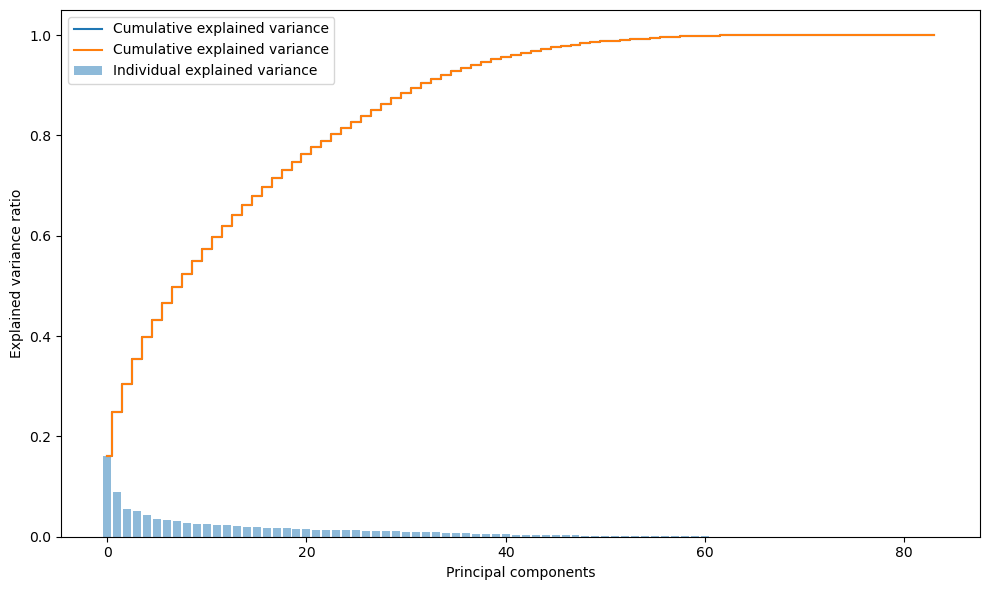

In [138]:
# Plotting the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.bar(range(len(var_ratio)), var_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(var_ratio)), np.cumsum(var_ratio), where='mid', label='Cumulative explained variance')
plt.step(range(len(var_ratio)), np.cumsum(var_ratio), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The plot above illustrates the explained variance ratio of each principal component and their cumulative explained variance. The first few principal components show a significant amount of variance in the data. As we move to higher-numbered components, their contribution to the explained variance decreases. To determine if one or two features can predict 75% of the price of the vehicle, I would like to look at the cumulative explained variance for the first two principal components.

In [139]:
# Cumulative explained variance for the first two components
two_comp = np.cumsum(explained_variance_ratio)[:2]
two_comp

array([0.16031993, 0.24909608])

The first two principal components together explain approximately 24.9% of the variance in the dataset. This is significantly less than the 75% threshold of the project requirement. To reach a cumulative explained variance of 75%, I will need to consider more principal components.

In [140]:
# Number of components needed to explain at least 75% of the variance
var_75 = np.where(np.cumsum(explained_variance_ratio) >= 0.75)[0][0] + 1  
var_75

21

To capture at least 75% of the variance in the dataset, I need 21 principal components. But my goal is to identify which original features contribute the most to these principal components, for this I will examine the absolute values of the PCA loadings for the first few components. 

In [141]:
# Getting the PCA loadings for the first principal component
comp = pca.components_[0]

In [142]:
# Getting the features with the highest absolute loadings for the first component
top_comp = pd.Series(comp, index=X_encoded.columns).abs().sort_values(ascending=False)

In [143]:
# Displaying the top features for the first component
top_comp.head()

curb-weight        0.258089
highway-L/100km    0.248038
city-L/100km       0.242190
horsepower         0.237673
highway-mpg        0.237466
dtype: float64

For the first principal component, the features with the highest absolute loadings are as follows: 1)curb-weight 2)highway-L/100km 3)city-L/100km 4)horsepower 5)highway-mpg. Since I am interested in finding one or two features that predict a significant portion of the price of a vehicle, I will choose curb-weight and highway-L/100km because they have the highest loadings for the first principal component. However, relying on these two features will not contribute to the 75% variance threshold. Instead, this is an approximation based on the most significant contributors to the first principal component. To illustrate further, I would like to visualize their relationship with the price using scatter plots.

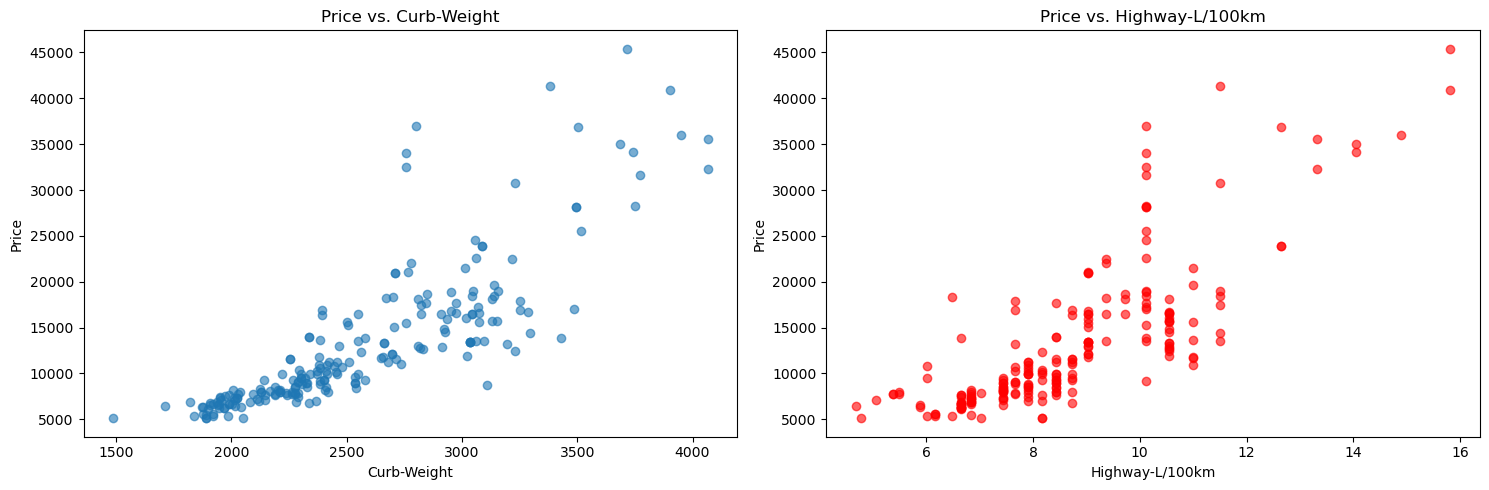

In [144]:
# Plotting scatter plots for 'curb-weight' and 'highway-L/100km' against 'price'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for 'curb-weight'
ax[0].scatter(data['curb-weight'], data['price'], alpha=0.6)
ax[0].set_title('Price vs. Curb-Weight')
ax[0].set_xlabel('Curb-Weight')
ax[0].set_ylabel('Price')

# Scatter plot for 'highway-L/100km'
ax[1].scatter(data['highway-L/100km'], data['price'], alpha=0.6, color='red')
ax[1].set_title('Price vs. Highway-L/100km')
ax[1].set_xlabel('Highway-L/100km')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

The scatter plots demonstrate the relationship between price and the two features:

Curb-Weight: There is a positive linear relationship between curb-weight and price. As curb-weight increases, the price of the automobile also increases.

Highway-L/100km: There seems to be a somewhat positive linear relationship with price. As the highway-L/100km (which indicates fuel consumption) increases, the price also seems to increase, although there is a bit more spread.

In conclusion, curb-weight and highway-L/100km are significant contributors to the first principal component, but relying solely on them will not capture 75% of the variance. To achieve that level of explained variance, I would need to consider many more features (as indicated by the 21 principal components earlier).